<a href="https://colab.research.google.com/github/vishakanilavan/Twitter-Sentiment-Analysis/blob/main/Project_3_(Twitter_sentiment_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Description

The following project is about analyzing the sentiments of tweets on social networking website
‘Twitter’. The dataset for this project is scraped from Twitter. It contains 1,600,000 tweets
extracted using Twitter API. It is a labeled dataset with tweets annotated with the sentiment (0 =
negative, 2 = neutral, 4 = positive).
It contains the following 6 fields:

1. target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
2. ids: The id of the tweet .
3. date: The date of the tweet (Sat May 16 23:58:44 UTC 2009)
4. flag: The query. If there is no query, then this value is NO_QUERY.
5. user: The user that tweeted
6. text: The text of the tweet.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:

df = pd.read_csv("/content/drive/MyDrive/PROJECTS/twitter_new.csv" ,encoding= "latin-1")

In [3]:
df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


# Data Preprocessing:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [7]:


def remove_url(text):
  pattern='@\S+|https?://\S+|www\.\S+|\S+.com' #For removing @usernames,url's,.com's in the text
  text=re.sub(pattern,"",text)
    #df_column=df_column.str.replace("[^a-zA-Z#]"," ",regex=True) # For removing punctuations
  return text

def remove_punctuations(text):
  text=re.sub("[^a-zA-Z#]"," ",text) #removes other than alpha and words start with # for finding any hastags
  return text


In [8]:
df['clean_text']=df.text.map(lambda x:remove_url(x))
df['clean_text']=df.clean_text.map(lambda x:remove_punctuations(x))
df['clean_text']=df.clean_text.apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))

In [9]:
df

,target,ids,date,flag,user,text,clean_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Awww that bummer shoulda David Carr Third
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset that update Facebook texting might resul...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dived many times ball Managed save rest bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",behaving here because over there
...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,Just woke Having school best feeling ever
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,Very cool hear Walt interviews
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,ready your MoJo Makeover details
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Happy Birthday alll time Tupac Amaru Shakur


In [ ]:
#pip install nltk #Nature language tool kit 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
from nltk.corpus import stopwords
stop=set(stopwords.words("english"))

In [12]:
def remove_stopwords(text):
  text=[word.lower()for word in text.split() if word.lower() not in stop]
  return " ".join(text)

In [13]:
df['clean_text']=df['clean_text'].map(remove_stopwords)

In [14]:
from nltk.stem.porter import PorterStemmer # Getting root words of text by stemming 
stemmer=PorterStemmer()
def stemming(text):
  text=[stemmer.stem(word) for word in text.split()]
  return " ".join(text)

In [15]:
df['clean_text']=df['clean_text'].map(stemming)

In [46]:
df

,target,ids,date,flag,user,text,clean_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww bummer shoulda got david carr third day
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dive mani time ball manag save rest go bound
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",behav mad see
...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,woke school best feel ever
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,cool hear old walt interview
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,readi mojo makeov ask detail
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,happi th birthday boo alll time tupac amaru sh...


# Exploratory Data Analysis:


In [1]:
#pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


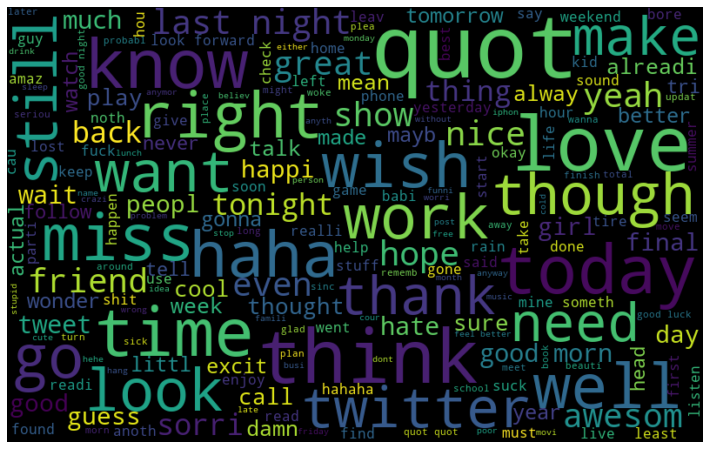

In [16]:
# visualise the frequent words
all_words=" ".join(sentence for sentence in df['clean_text'])

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)
#plotting the figure:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

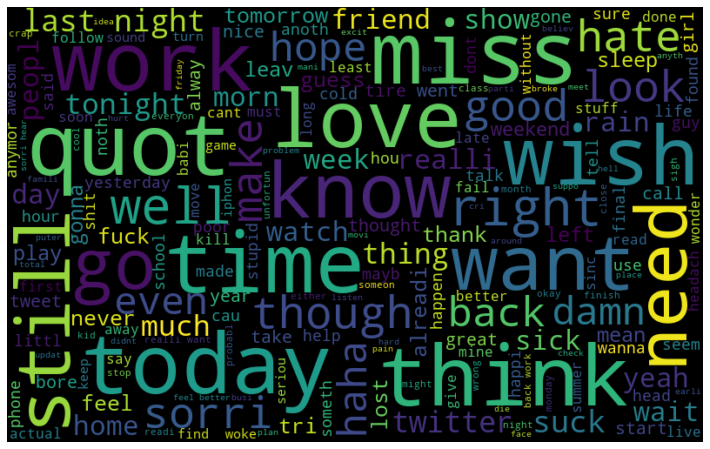

In [17]:
# visualise the frequent words for Negative (i.e target=0)
all_words=" ".join(sentence for sentence in df['clean_text'][df['target']==0])

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)
#plotting the figure:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

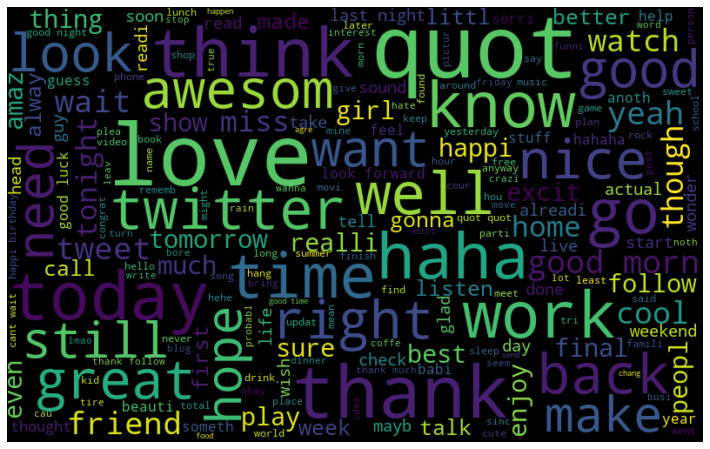

In [18]:
# visualise the frequent words for positive (i.e target=4)
all_words=" ".join(sentence for sentence in df['clean_text'][df['target']==4])

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)
#plotting the figure:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
# Extract hashtag from tweets:
def extract_hashtags(tweets):
  hashtags=[]
  for tweet in tweets:
    ht=re.findall(r"#(\w+)",tweet)
    hashtags.append(ht)
  hashtags=sum(hashtags,[]) #unnest the list to form single list as re.findall returns list
  return hashtags
  

In [20]:
ht_positive=extract_hashtags(df['clean_text'][df['target']==4])
ht_negative=extract_hashtags(df['clean_text'][df['target']==0])

In [21]:
freq=nltk.FreqDist(ht_positive)
positive_df=pd.DataFrame({"Hashtag":list(freq.keys()),
                          "Counts":list(freq.values())}
                         )
positive_df=positive_df.sort_values(['Counts'],ascending=False).head(10)
positive_df

,Hashtag,Counts
79,followfriday,2514
5002,seb,428
5,musicmonday,389
1218,squarespac,283
4242,mcflyforgermani,219
2898,myweak,217
170,asot,197
1541,delongeday,161
4040,mileymonday,160
3452,andyhurleyday,153


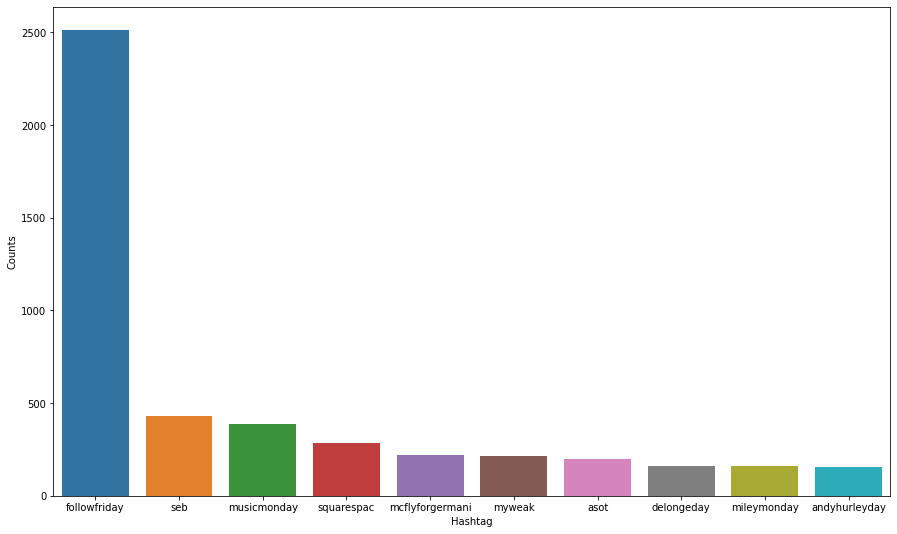

In [22]:
import seaborn as sns
plt.figure(figsize=(15,9))
sns.barplot(data=positive_df,x='Hashtag',y='Counts')
plt.show()

In [23]:
freq=nltk.FreqDist(ht_negative)
negative_df=pd.DataFrame({"Hashtag":list(freq.keys()),
                          "Counts":list(freq.values())}
                         )
negative_df=negative_df.sort_values(['Counts'],ascending=False).head(10)
negative_df

,Hashtag,Counts
3428,squarespac,655
3496,iranelect,442
9,fail,331
65,iphon,257
4574,inaperfectworld,182
3487,bsb,174
3480,irememb,148
3584,trackl,146
130,followfriday,146
104,asot,139


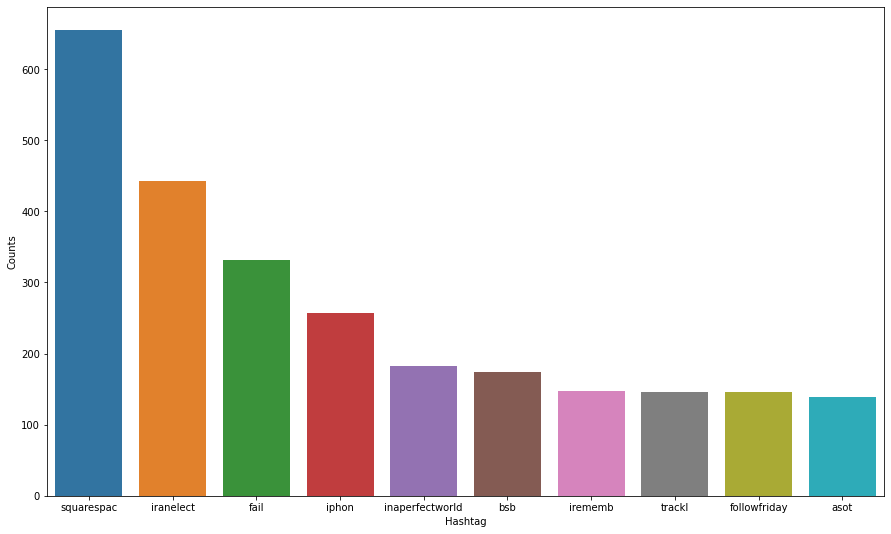

In [24]:
plt.figure(figsize=(15,9))
sns.barplot(data=negative_df,x='Hashtag',y='Counts')
plt.show()

# Feature Extraction And Input Split:


In [25]:
#feature extraction:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.9,min_df=2,max_features=1000,stop_words='english') #Bag of words vectorizer
bow=bow_vectorizer.fit_transform(df['clean_text'])

In [26]:
bow[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [46]:
from sklearn.model_selection import train_test_split
xtrain_bow,xtest_bow,ytrain_bow,ytest_bow=train_test_split(bow,df['target'],random_state=42,test_size=0.3)

In [44]:
#feature extraction:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
tfidf = tfidfvectorizer.fit_transform(df['clean_text'])

In [47]:
from sklearn.model_selection import train_test_split
xtrain_tfidf,xtest_tfidf,ytrain_tfidf,ytest_tfidf=train_test_split(tfidf,df['target'],random_state=42,test_size=0.3)

In [56]:
from gensim.models import Word2Vec
tokenized_tweet=df['clean_text'].apply(lambda x: x.split())
w2v=Word2Vec(tokenized_tweet, size=200, window=5)
w2v.train(tokenized_tweet,total_examples=len(tokenized_tweet),epochs=20)

(157221008, 178056960)

In [58]:
w2v.wv.most_similar(positive="dinner")

[('lunch', 0.7165496349334717),
 ('supper', 0.6485574245452881),
 ('meal', 0.6024235486984253),
 ('breakfast', 0.5839989185333252),
 ('brunch', 0.5578633546829224),
 ('grub', 0.5312433242797852),
 ('steak', 0.5149733424186707),
 ('pizza', 0.5140306353569031),
 ('lasagn', 0.5119373202323914),
 ('cookout', 0.5095780491828918)]

In [61]:
def word_vector(tokens,size):
  vector=np.zeros(size).reshape((1,size))
  count=0
  for word in tokens:
    try:
      vector+=w2v[word].reshape((1,size))
      count+=1
    except KeyError: # handling when token is not vocabulary
      continue
    if count !=0:
      vector/=count
    return vector
    




In [62]:
wordvec_arrays=np.zeros((len(tokenized_tweet),200))
for i in range(len(tokenized_tweet)):
  wordvec_arrays[i,:]=word_vector(tokenized_tweet[i],200)

wordvec_df=pd.DataFrame(wordvec_arrays)
wordvec_df.shape

<ipython-input-61-9ada5af040f9>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vector+=w2v[word].reshape((1,size))


(1600000, 200)

In [63]:
from sklearn.model_selection import train_test_split
xtrain_w2v,xtest_w2v,ytrain_w2v,ytest_w2v=train_test_split(tfidf,df['target'],random_state=42,test_size=0.3)

# Model Building, Tranining and Testing

In [48]:
# Model building
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,roc_curve,f1_score
model=LogisticRegression()



LogisticRegression()

Confusion Matrix:
[[160312  79049]
 [ 52116 188523]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.67      0.71    239361
           4       0.70      0.78      0.74    240639

    accuracy                           0.73    480000
   macro avg       0.73      0.73      0.73    480000
weighted avg       0.73      0.73      0.73    480000

Accuracy: 0.7267395833333333
Precision: 0.704569237438895
F1_score: 0.7419083805742103


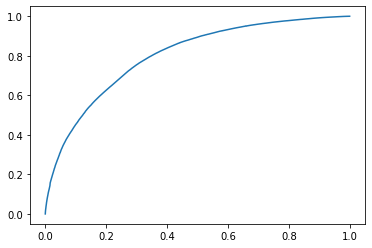

In [49]:
#model Training with bag of words vectors
model.fit(xtrain_bow,ytrain_bow)
#testing
y_pred=model.predict(xtest_bow)
result = confusion_matrix(ytest_bow, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(ytest_bow, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(ytest_bow,y_pred)
print("Accuracy:",result2)
print("Precision:",precision_score(ytest_bow,y_pred,pos_label=4))
print("F1_score:",f1_score(ytest_bow, y_pred, average="binary", pos_label=4)) # Here positive label is 4 in given dataset
pred_prob=model.predict_proba(x_test)
fpr,tpr,thresh=roc_curve(ytest_bow,pred_prob[:,1],pos_label=4)
plt.plot(fpr,tpr)



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[171690  67671]
 [ 51559 189080]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74    239361
           4       0.74      0.79      0.76    240639

    accuracy                           0.75    480000
   macro avg       0.75      0.75      0.75    480000
weighted avg       0.75      0.75      0.75    480000

Accuracy: 0.7516041666666666
Precision: 0.7364333537162465
F1_score: 0.7602887070508052


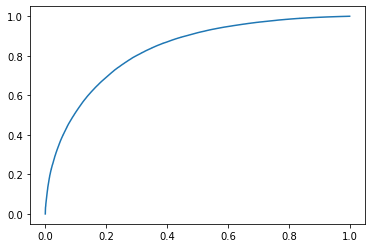

In [51]:
#model Training with tfidf vectors
model.fit(xtrain_tfidf,ytrain_tfidf)
#testing
y_pred=model.predict(xtest_tfidf)
result = confusion_matrix(ytest_tfidf, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(ytest_tfidf, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(ytest_tfidf,y_pred)
print("Accuracy:",result2)
print("Precision:",precision_score(ytest_tfidf,y_pred,pos_label=4))
print("F1_score:",f1_score(ytest_tfidf, y_pred, average="binary", pos_label=4)) # Here positive label is 4 in given dataset
pred_prob=model.predict_proba(xtest_tfidf)
fpr,tpr,thresh=roc_curve(ytest_tfidf,pred_prob[:,1],pos_label=4)
plt.plot(fpr,tpr)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[171690  67671]
 [ 51559 189080]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74    239361
           4       0.74      0.79      0.76    240639

    accuracy                           0.75    480000
   macro avg       0.75      0.75      0.75    480000
weighted avg       0.75      0.75      0.75    480000

Accuracy: 0.7516041666666666
Precision: 0.7364333537162465
F1_score: 0.7602887070508052


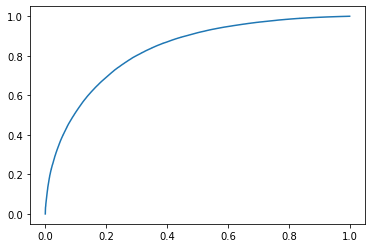

In [64]:
#model Training with w2v vectors
model.fit(xtrain_w2v,ytrain_w2v)
#testing
y_pred=model.predict(xtest_w2v)
result = confusion_matrix(ytest_w2v, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(ytest_w2v, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(ytest_w2v,y_pred)
print("Accuracy:",result2)
print("Precision:",precision_score(ytest_w2v,y_pred,pos_label=4))
print("F1_score:",f1_score(ytest_w2v, y_pred, average="binary", pos_label=4)) # Here positive label is 4 in given dataset
pred_prob=model.predict_proba(xtest_w2v)
fpr,tpr,thresh=roc_curve(ytest_w2v,pred_prob[:,1],pos_label=4)
plt.plot(fpr,tpr)

In [65]:

# Model building
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,roc_curve,f1_score
model=RandomForestClassifier(max_depth=20,random_state=42)




Confusion Matrix:
[[127510 111851]
 [ 38400 202239]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.53      0.63    239361
           4       0.64      0.84      0.73    240639

    accuracy                           0.69    480000
   macro avg       0.71      0.69      0.68    480000
weighted avg       0.71      0.69      0.68    480000

Accuracy: 0.6869770833333333
Precision: 0.6438886943232831
F1_score: 0.7291452222616809


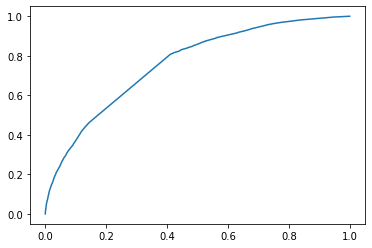

In [66]:
#model Training
model.fit(xtrain_bow,ytrain_bow)
#testing
y_pred=model.predict(xtest_bow)
result = confusion_matrix(ytest_bow, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(ytest_bow, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(ytest_bow,y_pred)
print("Accuracy:",result2)
print("Precision:",precision_score(ytest_bow,y_pred,pos_label=4))
print("F1_score:",f1_score(ytest_bow, y_pred, average="binary", pos_label=4)) # Here positive label is 4 in given dataset
pred_prob=model.predict_proba(x_test)
fpr,tpr,thresh=roc_curve(ytest_bow,pred_prob[:,1],pos_label=4)
plt.plot(fpr,tpr)



Confusion Matrix:
[[156549  82812]
 [ 52028 188611]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.65      0.70    239361
           4       0.69      0.78      0.74    240639

    accuracy                           0.72    480000
   macro avg       0.72      0.72      0.72    480000
weighted avg       0.72      0.72      0.72    480000

Accuracy: 0.7190833333333333
Precision: 0.6948968952520604
F1_score: 0.736672512312962


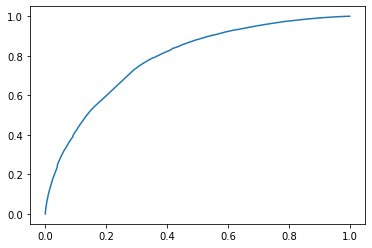

In [67]:
#model Training with tfidf vectors
model.fit(xtrain_tfidf,ytrain_tfidf)
#testing
y_pred=model.predict(xtest_tfidf)
result = confusion_matrix(ytest_tfidf, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(ytest_tfidf, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(ytest_tfidf,y_pred)
print("Accuracy:",result2)
print("Precision:",precision_score(ytest_tfidf,y_pred,pos_label=4))
print("F1_score:",f1_score(ytest_tfidf, y_pred, average="binary", pos_label=4)) # Here positive label is 4 in given dataset
pred_prob=model.predict_proba(xtest_tfidf)
fpr,tpr,thresh=roc_curve(ytest_tfidf,pred_prob[:,1],pos_label=4)
plt.plot(fpr,tpr)

Confusion Matrix:
[[156549  82812]
 [ 52028 188611]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.65      0.70    239361
           4       0.69      0.78      0.74    240639

    accuracy                           0.72    480000
   macro avg       0.72      0.72      0.72    480000
weighted avg       0.72      0.72      0.72    480000

Accuracy: 0.7190833333333333
Precision: 0.6948968952520604
F1_score: 0.736672512312962


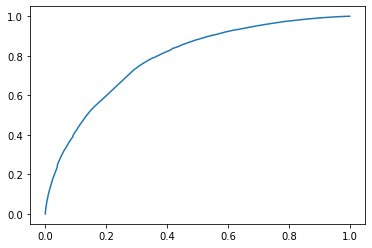

In [68]:
#model Training with w2v vectors
model.fit(xtrain_w2v,ytrain_w2v)
#testing
y_pred=model.predict(xtest_w2v)
result = confusion_matrix(ytest_w2v, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(ytest_w2v, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(ytest_w2v,y_pred)
print("Accuracy:",result2)
print("Precision:",precision_score(ytest_w2v,y_pred,pos_label=4))
print("F1_score:",f1_score(ytest_w2v, y_pred, average="binary", pos_label=4)) # Here positive label is 4 in given dataset
pred_prob=model.predict_proba(xtest_w2v)
fpr,tpr,thresh=roc_curve(ytest_w2v,pred_prob[:,1],pos_label=4)
plt.plot(fpr,tpr)